# LOADING ALL MODULES

In [53]:
# import system libs
import os
import time
import shutil
import pathlib
import itertools
from PIL import Image

# import data handling tools

import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# import Deep learning Libraries

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers,models,Model
# Ignore Warnings

import warnings
warnings.filterwarnings("ignore")

# LOADING DATASET

In [32]:
dataset = {
             "train_data" : r"D:\Winter Semester 3\AIML\Project\Alzheiemer_image\Alzheimer_s Dataset\train",
             "test_data" : r"D:\Winter Semester 3\AIML\Project\Alzheiemer_image\Alzheimer_s Dataset\test"
          }
filepaths = []
labels = []
all_data = []
for path in dataset.values():
    data = {"imgpath": [] , "labels": [] }
    category = os.listdir(path)

    for folder in category:
        folderpath = os.path.join(path , folder)
        filelist = os.listdir(folderpath)
        for file in filelist:
            fpath = os.path.join(folderpath, file)
            data["imgpath"].append(fpath)
            data["labels"].append(folder)
        
        
    all_data.append(data.copy())
    data.clear()

    
Fseries = pd.Series(fpath, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
train_df = pd.DataFrame(all_data[0] , index=range(len(all_data[0]['imgpath'])))
test_df = pd.DataFrame(all_data[1] , index=range(len(all_data[1]['imgpath'])))


# #Convert labels to numbers
lb = LabelEncoder()
train_df['encoded_labels'] = lb.fit_transform(train_df['labels'])
test_df = test_df.reset_index(drop=True)

# TRAINING DATA IMAGES COUNT PER CLAS

labels
NonDemented         2560
VeryMildDemented    1792
MildDemented         717
ModerateDemented      52
Name: count, dtype: int64
Total Number Of Images in Model 5121


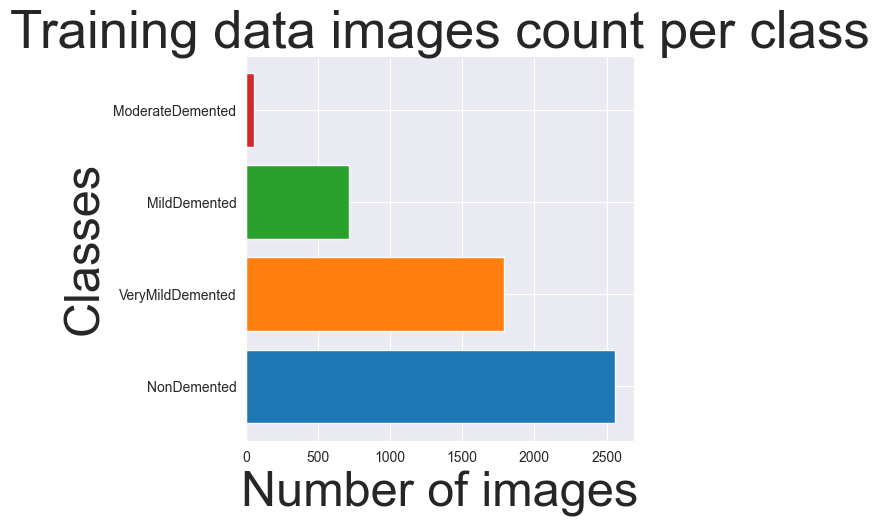

In [33]:
train  = train_df["labels"].value_counts()
label = train.tolist()
index = train.index.tolist()
print(train)
a=0
for i in label:
    a+=i
print("Total Number Of Images in Model",a)
colors = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"
]



plt.figure(figsize=(5,5))
plt.title("Training data images count per class",fontsize=38)
plt.xlabel('Number of images', fontsize=35)
plt.ylabel('Classes', fontsize=35)
plt.barh(index,label, color=colors)
plt.grid(True)
plt.show()

In [35]:
train_df.sample(n=15, random_state=1)

,imgpath,labels,encoded_labels
2781,D:\Winter Semester 3\AIML\Project\Alzheiemer_i...,NonDemented,2
108,D:\Winter Semester 3\AIML\Project\Alzheiemer_i...,MildDemented,0
758,D:\Winter Semester 3\AIML\Project\Alzheiemer_i...,ModerateDemented,1
5095,D:\Winter Semester 3\AIML\Project\Alzheiemer_i...,VeryMildDemented,3
3939,D:\Winter Semester 3\AIML\Project\Alzheiemer_i...,VeryMildDemented,3
4427,D:\Winter Semester 3\AIML\Project\Alzheiemer_i...,VeryMildDemented,3
573,D:\Winter Semester 3\AIML\Project\Alzheiemer_i...,MildDemented,0
1787,D:\Winter Semester 3\AIML\Project\Alzheiemer_i...,NonDemented,2
2253,D:\Winter Semester 3\AIML\Project\Alzheiemer_i...,NonDemented,2
1296,D:\Winter Semester 3\AIML\Project\Alzheiemer_i...,NonDemented,2


In [37]:
print("----------Train-------------")
print(train_df[["imgpath", "labels"]].head(5))
print(train_df.shape)
print("----------Test--------------")
print(test_df[["imgpath", "labels"]].head(5))
print(test_df.shape)

----------Train-------------
                                             imgpath        labels
0  D:\Winter Semester 3\AIML\Project\Alzheiemer_i...  MildDemented
1  D:\Winter Semester 3\AIML\Project\Alzheiemer_i...  MildDemented
2  D:\Winter Semester 3\AIML\Project\Alzheiemer_i...  MildDemented
3  D:\Winter Semester 3\AIML\Project\Alzheiemer_i...  MildDemented
4  D:\Winter Semester 3\AIML\Project\Alzheiemer_i...  MildDemented
(5121, 3)
----------Test--------------
                                                imgpath            labels
226   D:\Winter Semester 3\AIML\Project\Alzheiemer_i...       NonDemented
1052  D:\Winter Semester 3\AIML\Project\Alzheiemer_i...  VeryMildDemented
13    D:\Winter Semester 3\AIML\Project\Alzheiemer_i...      MildDemented
433   D:\Winter Semester 3\AIML\Project\Alzheiemer_i...       NonDemented
362   D:\Winter Semester 3\AIML\Project\Alzheiemer_i...       NonDemented
(512, 2)


In [38]:
# valid and test dataframe
valid_df, test_df = train_test_split(test_df,  train_size= 0.6, shuffle= True, random_state= 123)

# SHOW SAMPLE FROM DATASET

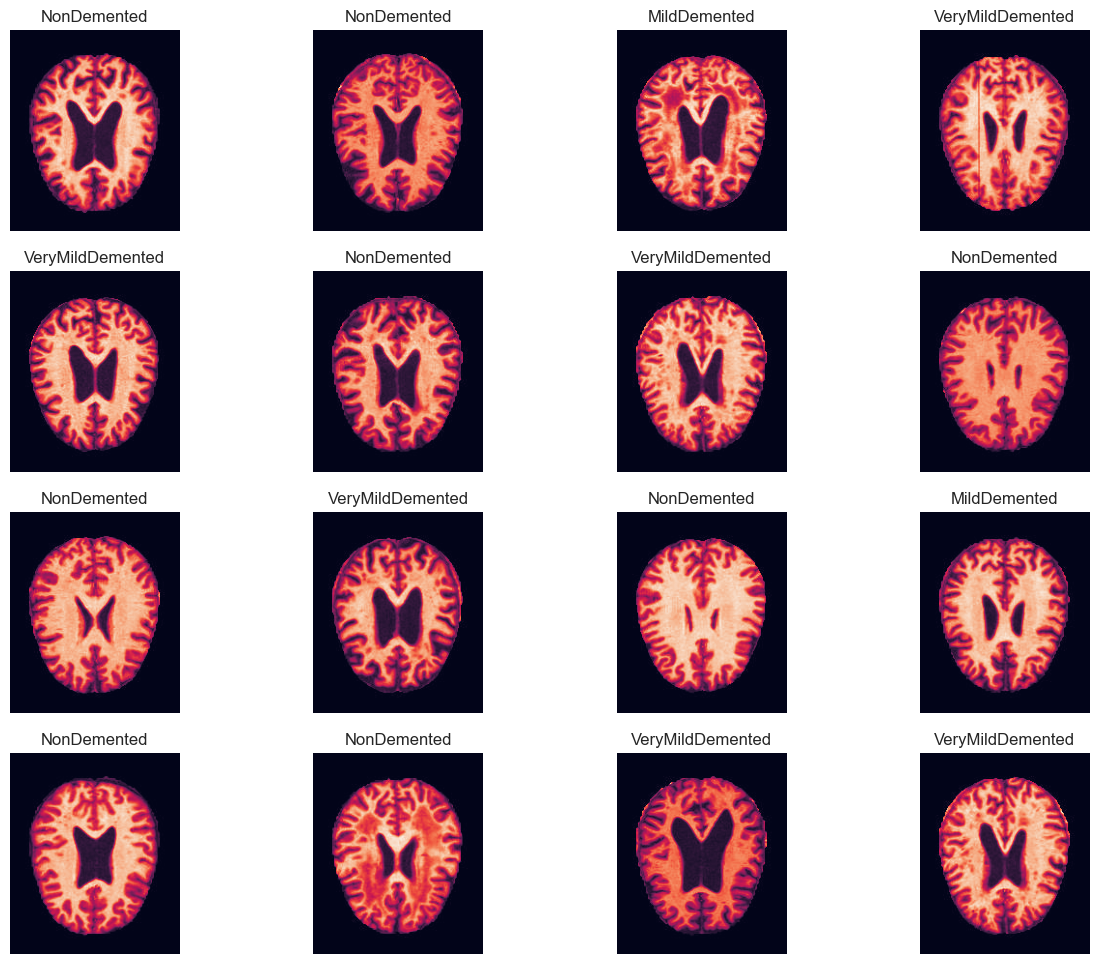

In [40]:
plt.figure(figsize=(15,12))
for i, row in valid_df.sample(n=16).reset_index().iterrows():
    plt.subplot(4,4,i+1)
    image_path = row['imgpath']
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(row["labels"])
    plt.axis('off')
plt.show()

# CREATING DATALOADERS

In [42]:
BATCH_SIZE = 32
IMAGE_SIZE = (224, 224)


generator = ImageDataGenerator(
    preprocessing_function = tf.keras.applications.efficientnet.preprocess_input,
    # there could be image augmentation here
)

# Split the data into tWO categories.
train_images = generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='imgpath',
    y_col='labels',
    target_size=IMAGE_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42,
)


test_images = generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='imgpath',
    y_col='labels',
    target_size=IMAGE_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 5121 validated image filenames belonging to 4 classes.
Found 205 validated image filenames belonging to 4 classes.


# MODEL STRUCTURE

In [59]:
# Create Model Structure
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer

# create pre-trained model (you can built on pretrained model such as :  efficientnet, VGG , Resnet )
# we will use efficientnetb3 from EfficientNet family.
base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top= False, weights= "imagenet", input_shape= img_shape, pooling= 'max')
# base_model.trainable = False
for i, layer in enumerate(base_model.layers):
    base_model.layers[i].trainable = False

# TRAINING : TRANSFER LEARNING

In [60]:

model = Sequential([
    base_model,
    BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
    Dense(256, kernel_regularizer= regularizers.l2(0.016), activity_regularizer= regularizers.l1(0.006),
                bias_regularizer= regularizers.l1(0.006), activation= 'relu'),
    Dropout(rate= 0.45, seed= 123),
    Dense(class_count, activation= 'softmax')
])

model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ ?                      │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,049,571 (15.45 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 4,049,571 (15.45 MB)

In [45]:
batch_size = 20   # set batch size for training
epochs =  1  # number of all epochs in training

history = model.fit(x= train_images, epochs= epochs, verbose= 1, validation_data= train_images, 
                    validation_steps= None, shuffle= False)


321/321 ━━━━━━━━━━━━━━━━━━━━ 715s 2s/step - accuracy: 0.4106 - loss: 11.0900 - val_accuracy: 0.4935 - val_loss: 5.8188


# DISPLAYING MODEL PERFORMANCE

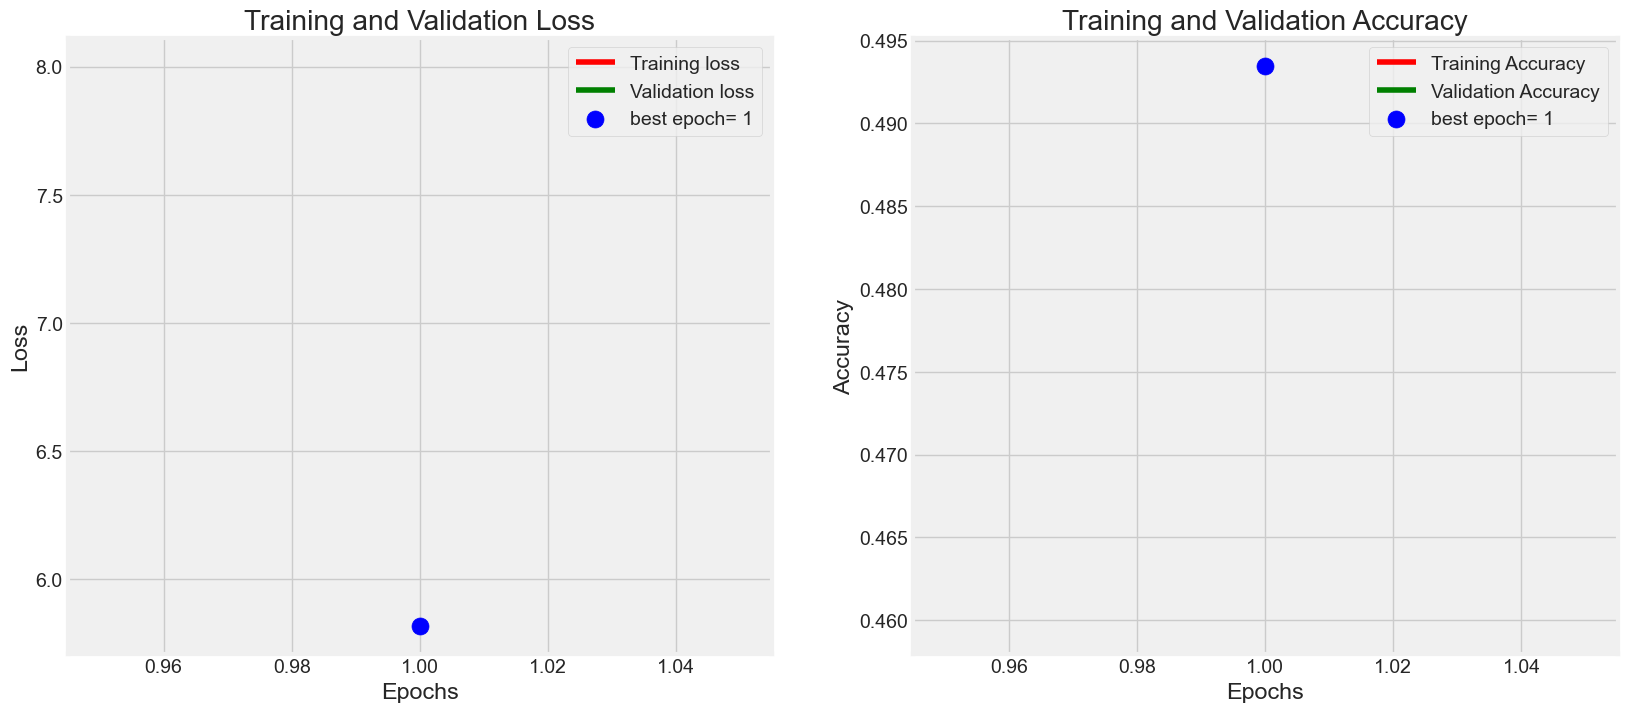

In [65]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'
# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')
plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout
plt.show()

In [70]:
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_images, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_images, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 659ms/step - accuracy: 0.0310 - loss: 79.6432
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 305ms/step - accuracy: 0.0259 - loss: 44.5358
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 671ms/step - accuracy: 0.0111 - loss: 81.5188
Train Loss:  78.80393981933594
Train Accuracy:  0.01875000074505806
--------------------
Validation Loss:  44.4719352722168
Validation Accuracy:  0.012500000186264515
--------------------
Test Loss:  81.85343933105469
Test Accuracy:  0.012500000186264515


In [ ]:
preds = model.predict_generator(test_images)


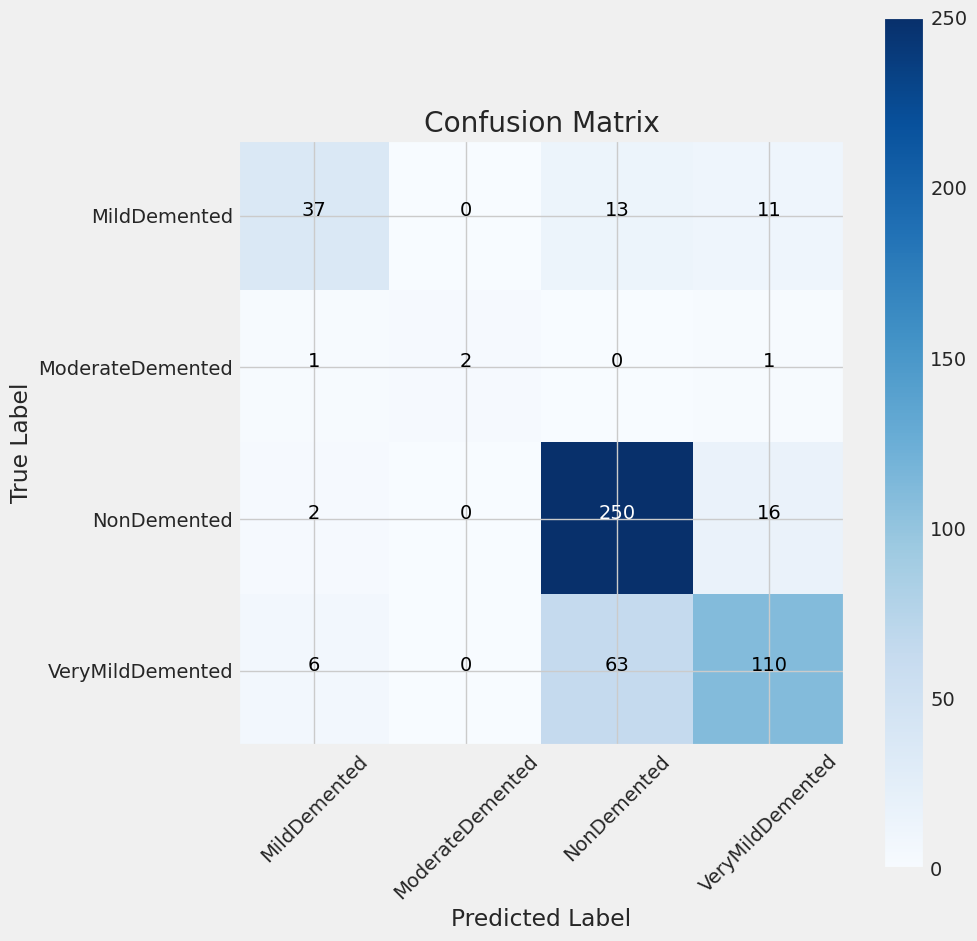

In [15]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [16]:
# Classification report
print(classification_report(test_gen.classes, y_pred, target_names= classes))

                  precision    recall  f1-score   support

    MildDemented       0.80      0.61      0.69        61
ModerateDemented       1.00      0.50      0.67         4
     NonDemented       0.77      0.93      0.84       268
VeryMildDemented       0.80      0.61      0.69       179

        accuracy                           0.78       512
       macro avg       0.84      0.66      0.72       512
    weighted avg       0.78      0.78      0.77       512



In [17]:
#Save the model
model.save('model.h5')

In [18]:
loaded_model = tf.keras.models.load_model('/kaggle/working/model.h5', compile=False)
loaded_model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [19]:
image_path = '/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/VeryMildDemented/26 (46).jpg'
image = Image.open(image_path)

# Preprocess the image
img = image.resize((224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

# Make predictions
predictions = loaded_model.predict(img_array)
class_labels = classes
score = tf.nn.softmax(predictions[0])
print(f"{class_labels[tf.argmax(score)]}")

1/1 [==============================] - 1s 1s/step
VeryMildDemented
